In [1]:
import numpy as np 
import pandas as pd 

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

def missing_values_analysis(data):
    na_columns = [col for col in data.columns if data[col].isnull().sum() > 0]
    n_miss = data[na_columns].isnull().sum().sort_values(ascending=True)
    ratio = (data[na_columns].isnull().sum() / data.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_df(data, row_num=5, col_num=10):
    print("*************** Dataset Shape ***************")
    print("No. of Rows:", data.shape[0], "\nNo. of Columns:", data.shape[1])
    print("*************** Dataset Information ***************")
    print(data.info())
    print("*************** Types of Columns ***************")
    print(data.dtypes)
    print(f"*************** First {row_num} Rows ***************")
    print(data.iloc[:row_num,:col_num])
    print(f"*************** Last {row_num} Rows ***************")
    print(data.iloc[-row_num:,:col_num])
    print("*************** Summary Statistics of The Dataset ***************")
    print(data.describe([0.10, 0.25, 0.50, 0.70, 0.80, 0.90, 0.95, 0.99]).T)
    print("*************** Dataset Missing Values Analysis ***************")
    print(missing_values_analysis(data))

movies = pd.read_csv('/kaggle/input/millions-of-movies/movies.csv')
check_df(movies)

*************** Dataset Shape ***************
No. of Rows: 722662 
No. of Columns: 20
*************** Dataset Information ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722662 entries, 0 to 722661
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722662 non-null  int64  
 1   title                 722656 non-null  object 
 2   genres                511965 non-null  object 
 3   original_language     722662 non-null  object 
 4   overview              604169 non-null  object 
 5   popularity            722662 non-null  float64
 6   production_companies  337218 non-null  object 
 7   release_date          670563 non-null  object 
 8   budget                722662 non-null  float64
 9   revenue               722662 non-null  float64
 10  runtime               688238 non-null  float64
 11  status                722662 non-null  object 
 12  tagline           

In [2]:
rare_movies = movies[movies["vote_count"] <= 1000].index
movies = movies[~movies.index.isin(rare_movies)]

In [3]:
movies = movies.drop_duplicates(ignore_index=True)
movies.fillna(value={i: ' ' for i in ['overview', 'genres', 'keywords', 'credits']}, inplace=True)

In [4]:
movies = movies[['id','title','overview','genres','keywords','credits','poster_path']]

In [5]:
movies.head(2)

id                             title                                           overview                            genres                                           keywords                                            credits                       poster_path
0  615656                 Meg 2: The Trench  An exploratory dive into the deepest depths of...     Action-Science Fiction-Horror                based on novel or book-sequel-kaiju  Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...  /4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg
1  667538  Transformers: Rise of the Beasts  When a new threat capable of destroying the en...  Action-Adventure-Science Fiction  peru-alien-end of the world-based on cartoon-b...  Anthony Ramos-Dominique Fishback-Luna Lauren V...  /gPbM0MK8CP8A174rmUwGsADNYKD.jpg

In [6]:
import re
clean_str = lambda s: re.sub("[^0-9a-zA-Z\s]+", "", s)
strOp= lambda x: ' '.join(x.split('-'))
movies['tags'] = movies.title.apply(clean_str) + ' ' + movies.overview + movies.keywords.apply(strOp) + movies.genres.apply(strOp) + ' ' + movies.credits.apply(lambda x: ' '.join(x.replace(' ', '').split('-')[:5]))

In [7]:
new_df = movies[['id','title','tags','poster_path']]
new_df.head(2)

id                             title                                               tags                       poster_path
0  615656                 Meg 2: The Trench  Meg 2 The Trench An exploratory dive into the ...  /4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg
1  667538  Transformers: Rise of the Beasts  Transformers Rise of the Beasts When a new thr...  /gPbM0MK8CP8A174rmUwGsADNYKD.jpg

In [8]:
new_df.iloc[0]['tags']

'Meg 2 The Trench An exploratory dive into the deepest depths of the ocean of a daring research team spirals into chaos when a malevolent mining operation threatens their mission and forces them into a high-stakes battle for survival.based on novel or book sequel kaijuAction Science Fiction Horror JasonStatham WuJing ShuyaSophiaCai SergioPeris Mencheta'

In [17]:
# !pip install nltk
# !python -m nltk.downloader punkt
# !python -m nltk.downloader stopwords
# !python -m nltk.downloader wordnet
# !python -m nltk.downloader averaged_perceptron_tagger
# unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
# import zipfile
# zf = zipfile.ZipFile('/usr/share/nltk_data/corpora/wordnet.zip')
# zf.extractall('/usr/share/nltk_data/corpora/')
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):    
    text = text.lower()
    # split text (tokenize)
    words = word_tokenize(text)
    # remove stop words
    filtered_words = [word for word in words if word not in stop_words]
    # lemmatize the words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    cleaned_text = ' '.join(lemmatized_words)
    return cleaned_text
new_df['tags'] = new_df['tags'].apply(clean_text)

0       meg 2 trench exploratory dive deepest depth oc...
1       transformer rise beast new threat capable dest...
2       antman wasp quantumania super-hero partner sco...
3       creed iii dominating boxing world adonis creed...
4       fast x many mission impossible odds dom torett...
                              ...                        
3715    resident evil afterlife world ravaged virus in...
3716    rainy day new york two young people arrive new...
3717    xmen two mutant rogue wolverine come private a...
3718    internship two recently laid-off men 40 try ma...
3719    serial teacher 12 percent pupil obtaining bacc...
Name: tags, Length: 3720, dtype: object

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(new_df['tags'])

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(tfidf_matrix)
similarity.shape

(3720, 3720)

In [30]:
import matplotlib.pyplot as plt
from skimage import io
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = new_df.index[new_df['title'] == title][0]
    # show given movie poster
    try:
        a = io.imread(f'https://image.tmdb.org/t/p/w500/{new_df.loc[idx, "poster_path"]}')
        plt.imshow(a)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass
    
    print('Recommendations\n')


    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = new_df.iloc[movie_indices]
    
    # show reco. movie posters
    fig, ax = plt.subplots(3, 3, figsize=(15,20))
    ax=ax.flatten()
    for i, j in enumerate(result.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title,fontsize=22)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(a)
        except: pass
    fig.tight_layout()
    fig.show()

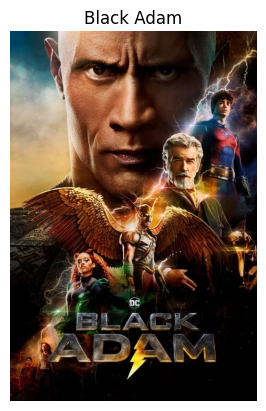

Recommendations



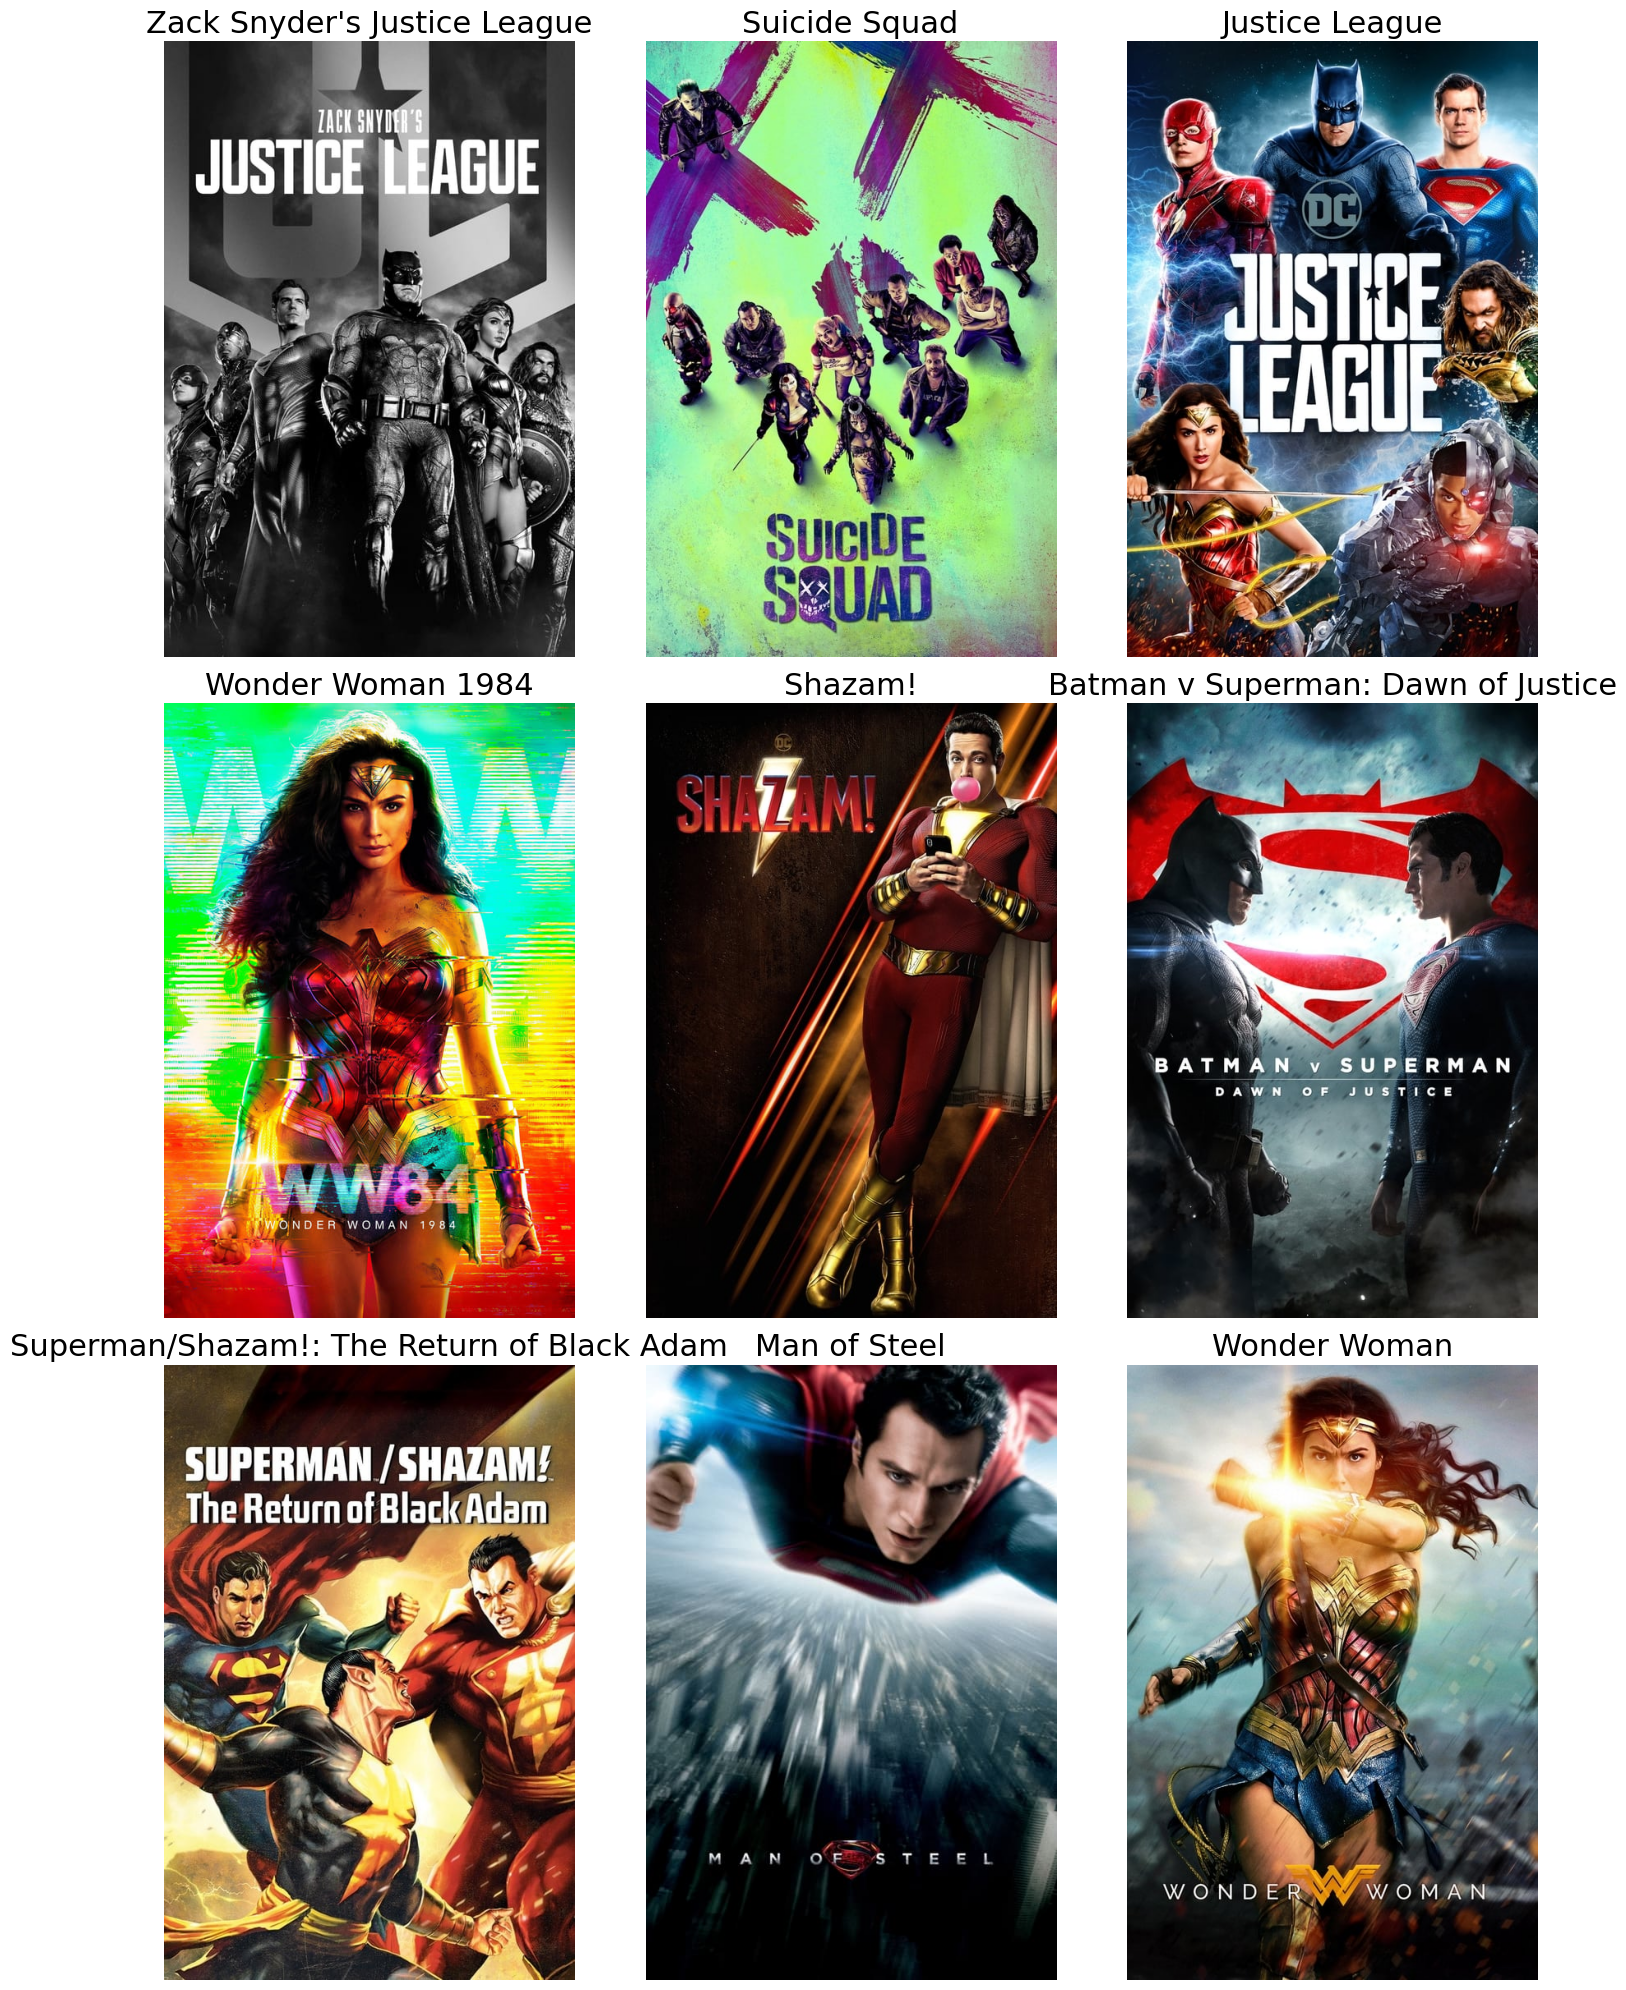

In [34]:
get_recommendations('Black Adam')

In [36]:
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(tfidf_vectorizer, model_file)
    pickle.dump(similarity, model_file)

# Veri setinizi kaydedin
new_df.to_pickle('movie_list.pkl')